<a href="https://colab.research.google.com/github/seanrote/neural_networks/blob/master/autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

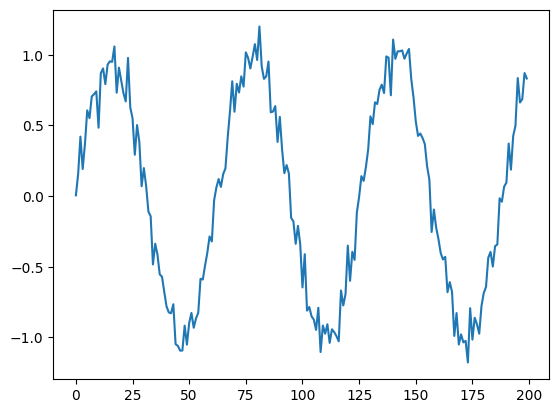

In [14]:
#making data with noise
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [15]:
#build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

In [16]:
#autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)
#training RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 65ms/step - loss: 0.3741 - val_loss: 0.1700
Epoch 2/80
3/3 [==============================] - 0s 23ms/step - loss: 0.1362 - val_loss: 0.1084
Epoch 3/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0796 - val_loss: 0.0665
Epoch 4/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0619 - val_loss: 0.0525
Epoch 5/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0514 - val_loss: 0.0919
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0708 - val_loss: 0.0648
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0553 - val_loss: 0.0511
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0419 - val_loss: 0.0295
Epoch 9/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0339 - val_loss: 0.0278
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0285 - val_loss: 0.0328
Epoch 11/80
3/3 [============

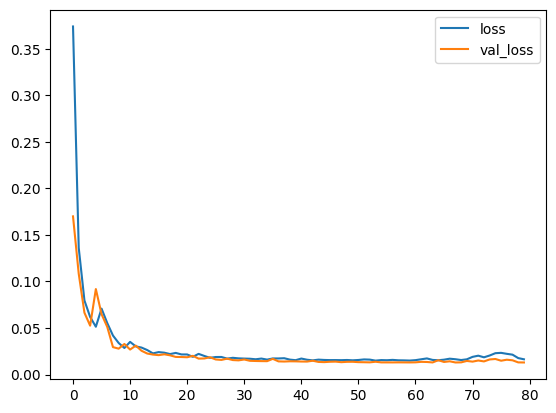

In [17]:
#plot loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [18]:
#wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] #1x1 array --> scalar
  i += 1

  #updating prediction list
  validation_predictions.append(p)



1/1 [==============================] - 0s 20ms/step


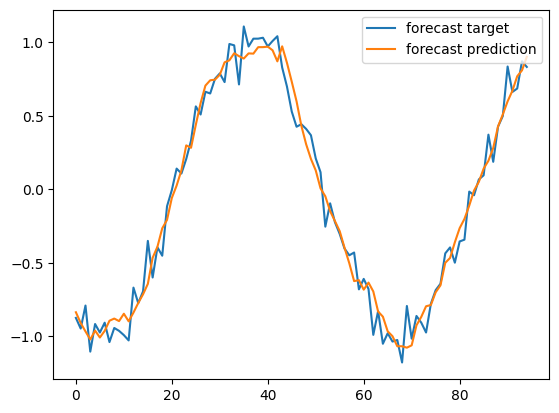

In [19]:
#incorrect way of forecasting
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [20]:
#forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]
  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 17ms/step


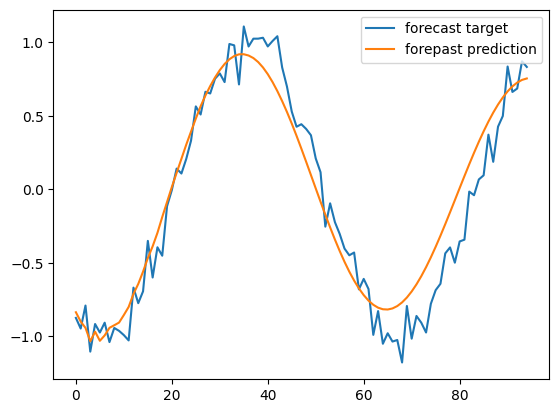

In [21]:
#realistic
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forepast prediction')
plt.legend()